In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import os
import glob


In [ ]:
def free_instanton_ode(y, t, epsilon):
    x_r, x_i, v_r, v_i = y

    eps = epsilon
    # Calculate the real and imaginary parts of the complex multiplication
    real_part = x_r * (1 - x_r**2 + 3* x_i**2) + 2 * eps * x_i * ( 1 + x_i**2 - 3 * x_r**2)
    imag_part = x_i * (1 + x_i**2 - 3* x_r**2) + 2 * eps * x_r * ( x_r**2 - 1 - 3 * x_i**2)
    # Return the derivatives
    dydt = [
        v_r,        # dx_r/dt = y_r
        v_i,        # dx_i/dt = y_i
        real_part,  # dy_r/dt = -Real part of the equation
        imag_part   # dy_i/dt = -Imaginary part of the equation
    ]
    return dydt


def free_hamiltonian(y,  epsilon, x0, m, lam):
    xr, xi, vr, vi = y

    eps = epsilon
    k = np.sqrt(m *lam)

    re_ham =  (1/4) * x0**3 * ( -2 * vi**2 + 2 * vr**2 + (1 + xi**2)**2 - 2* (1 + 3* xi**2)* xr**2 + xr**4 - 4* (vi* vr + xi* xr* (1 + xi**2 - xr**2)) * eps) * k

    im_ham = -(1/4) * x0**3 * (-4 * vi * vr + 4 * xi * xr * (1 + xi**2 - xr**2) +(2 * vi**2 - 2 * vr**2 + (1 + xi**2)**2 - 2 * (1 + 3 * xi**2) * xr**2 + xr**4)  * eps ) * k

    return re_ham, im_ham


def free_action(y, epsilon, x0, m, lam):

    xr, xi, vr, vi = y
    k = np.sqrt(m *lam)
    eps = epsilon

    actoin = (1/2) * x0**3 * (1 + 1j * eps)

####
#### Forced Harmonic Oscillator
####

def forced_instanton_ode(y, t, epsilon, m , lam, f0):
    xr, xi, vr, vi = y
    f = f0 * np.sqrt(m * lam) * lam**(-2) * x0**(-4)

    eps = epsilon
    re_eom = -(-f * t - xr - 3 * xi**2 * xr + xr**3 - 2 * eps * xi * (1 + xi**2 - 3 * xr**2 ))
    im_eom = -(- xi**3 + xi * ( -1 + 3 * xr**2) + 2* eps * ( f* t + xr + 3 * xi**2 * xr - xr**3 ))

    # Return the derivatives
    dydt = [
        vr,        # dx_r/dt = y_r
        vi,        # dx_i/dt = y_i
        re_eom,  # dy_r/dt = -Real part of the equation
        im_eom   # dy_i/dt = -Imaginary part of the equation
    ]
    return dydt

def forced_hamiltonian(y, t, epsilon, x0,  m, lam , f0):
    xr, xi, vr, vi = y

    f = f0 * np.sqrt(m * lam) * lam**(-2) * x0**(-4)
    k = np.sqrt(m *lam)

    eps = epsilon

    re_ham =  (1/4) * x0**3 * ( -2 * vi**2 + 2 * vr**2 + (1 + xi**2)**2 - 2* (1 + 3* xi**2)* xr**2 + xr**4 - 4* (vi* vr + xi* xr* (1 + xi**2 - xr**2)) * eps) * k  - f * t * x0**3 * k * (xr + xi * eps )
    im_ham = -(1/4) * x0**3 * (-4 * vi * vr + 4 * xi * xr * (1 + xi**2 - xr**2) + (2 * vi**2 - 2 * vr**2 + (1 + xi**2)**2 - 2 * (1 + 3 * xi**2) * xr**2 + xr**4)  * eps ) * k  + f * t * x0**3 * k *(-xi + xr * eps)


    ReH = re_ham - im_ham*epsilon
    ImH = im_ham + re_ham*epsilon

    return ReH, ImH


####
#### Forced Harmonic Oscillator Wick's rotated
####

def forced_instanton_ode_wo(y, t, epsilon, m , lam, f0):
    xr, xi, vr, vi = y
    f = f0 * np.sqrt(m * lam) * lam**(-2) * x0**(-4)

    eps = epsilon

    re_eom = -(-f * t - xr - 3 * xi**2 * xr + xr**3 - 2 * eps * xi * (1 + xi**2 - 3 * xr**2 ))
    im_eom = -(- xi**3 + xi * ( -1 + 3 * xr**2) + eps * (3 * f* t +  2 * xr * (1  + 3 * xi**2  -  xr**2 ) ))

    # Return the derivatives
    dydt = [
        vr,      # dx_r/dt = y_r
        vi,      # dx_i/dt = y_i
        re_eom,  # dy_r/dt = -Real part of the equation
        im_eom   # dy_i/dt = -Imaginary part of the equation
    ]
    return dydt


def forced_hamiltonian_wo(y, t,  epsilon, x0,  m, lam , f0):
    xr, xi, vr, vi = y

    f = f0 * np.sqrt(m * lam) * lam**(-2) * x0**(-4)
    eps = epsilon
    k = np.sqrt(m *lam)

    re_ham =  (1/4) * x0**3 * ( -2 * vi**2 + 2 * vr**2 + (1 + xi**2)**2 - 2* (1 + 3* xi**2)* xr**2 + xr**4 - 4* (vi* vr + xi* xr* (1 + xi**2 - xr**2)) * eps) * k  - f * t * x0**3 * k * (xr + 2* xi * eps )
    im_ham = -(1/4) * x0**3 * ( -4 * vi * vr + 4 * xi * xr * (1 + xi**2 - xr**2) + (2 * vi**2 - 2 * vr**2 + (1 + xi**2)**2 - 2 * (1 + 3 * xi**2) * xr**2 + xr**4)  * eps ) * k  - f * t * x0**3 * k *(xi - 2 * xr * eps)


    ReH = re_ham - im_ham*epsilon
    ImH = im_ham + re_ham*epsilon

    return ReH, ImH


In [ ]:
# Parameter
epsilon = 0.05  # regularization params
x0 = - 0.5
y0 = [-0.5, 0.0, 0.0, 0.0]  # Initial condition
f0 = 5e-5
t = np.linspace(0,80,100001)

sol = odeint(forced_instanton_ode, y0, t, args=(epsilon, 1, 1,f0), rtol= 10e-12, atol=10e-15)

sol0 = odeint(forced_instanton_ode, y0, t, args=(0, 1, 1,f0), rtol= 10e-12, atol=10e-15)

sol_nf = odeint(forced_instanton_ode, y0, t, args=(epsilon, 1, 1,0), rtol= 10e-12, atol=10e-15)

sol_wo = odeint(forced_instanton_ode_wo, y0, t, args=(epsilon, 1, 1,f0), rtol= 10e-12, atol=10e-15)

x_rnf = sol_nf[:, 0]
x_inf = sol_nf[:, 1]
v_rnf = sol_nf[:, 2]
v_inf = sol_nf[:, 3]

x_r0 = sol0[:, 0]
x_i0 = sol0[:, 1]
v_r0 = sol0[:, 2]
v_i0 = sol0[:, 3]

x_r = sol[:, 0]
x_i = sol[:, 1]
v_r = sol[:, 2]
v_i = sol[:, 3]

x_r_wo = sol_wo[:, 0]
x_i_wo = sol_wo[:, 1]
v_r_wo = sol_wo[:, 2]
v_i_wo = sol_wo[:, 3]

In [ ]:
def potential_profile(xr,xi, t, epsilon, x0,  m, lam , f0,):
    xr = xr
    xi = xi

    vr=0
    vi=0

    f = f0 * np.sqrt(m * lam) * lam**(-2) * x0**(-4)
    k = np.sqrt(m *lam)
    eps = epsilon

    re_ham =  (1/4) * x0**3 * ( -2 * vi**2 + 2 * vr**2 + (1 + xi**2)**2 - 2* (1 + 3* xi**2)* xr**2 + xr**4 - 4* (vi* vr + xi* xr* (1 + xi**2 - xr**2)) * eps) * k  - f * t * x0**3 * k * (xr + xi * eps )
    im_ham = -(1/4) * x0**3 * (-4 * vi * vr + 4 * xi * xr * (1 + xi**2 - xr**2) + (2 * vi**2 - 2 * vr**2 + (1 + xi**2)**2 - 2 * (1 + 3 * xi**2) * xr**2 + xr**4)  * eps ) * k  + f * t * x0**3 * k *(-xi + xr * eps)

    ReH = re_ham - im_ham*epsilon
    ImH = im_ham + re_ham*epsilon

    return ReH, ImH


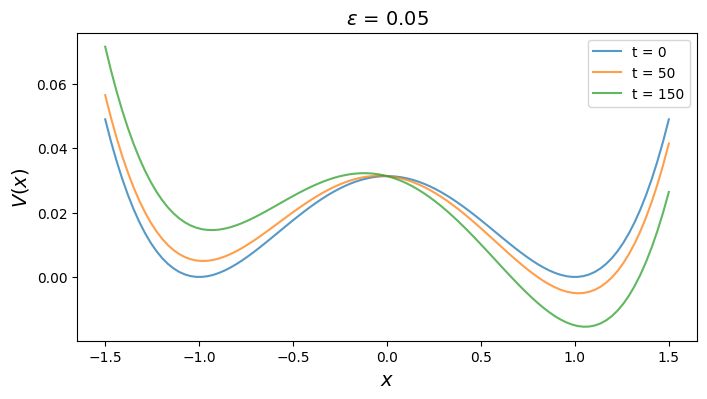

In [ ]:
xrange = np.linspace(-1.5,1.5,100)

plt.figure( figsize=(8,4))

for times in [0,50,150]:

    ReV, _ = potential_profile(xr = xrange, xi=0 , t=times, epsilon=epsilon, x0=x0, m = 1, lam = 1, f0 = f0)
    plt.plot(xrange, -ReV, label=f"t = {times}" ,alpha=0.75)
plt.legend()
plt.title(f'$\epsilon$ = {epsilon}', fontsize=14)
plt.xlabel(f"$x$", fontsize = 14)
plt.ylabel(f"$V(x)$", fontsize = 14)
plt.show()


In [ ]:
y = [x_r, x_i, v_r, v_i]
ynf = [x_rnf, x_inf, v_rnf, v_inf]
yh = [x_r0, x_i0, v_r0, v_i0]
y_wo = [x_r_wo, x_i_wo, v_r_wo, v_i_wo]



re_ham0, im_ham0 = forced_hamiltonian( y= yh, t=t, epsilon = 0, x0=x0, m= 1, lam=1, f0=f0)
re_hamnf, im_hamnf = forced_hamiltonian( y= ynf, t=t, epsilon = epsilon, x0=x0, m= 1, lam=1, f0=0)
re_ham, im_ham = forced_hamiltonian( y= y, t=t, epsilon = epsilon, x0=x0, m= 1, lam=1, f0=f0)
re_ham_wo, im_ham_wo = forced_hamiltonian_wo( y= y_wo, t=t, epsilon = epsilon, x0=x0, m= 1, lam=1, f0=f0)



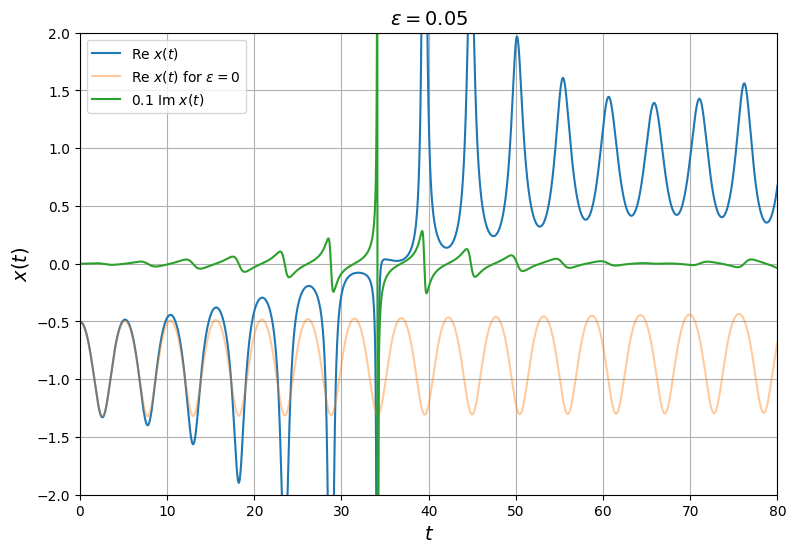

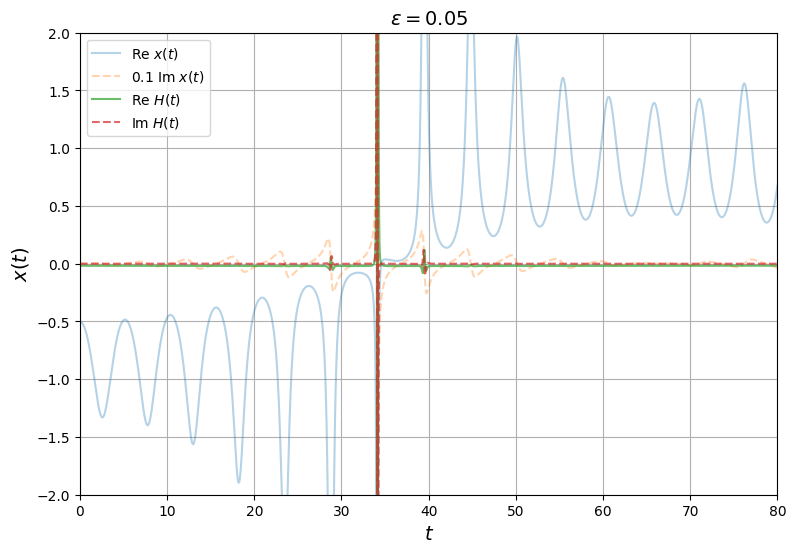

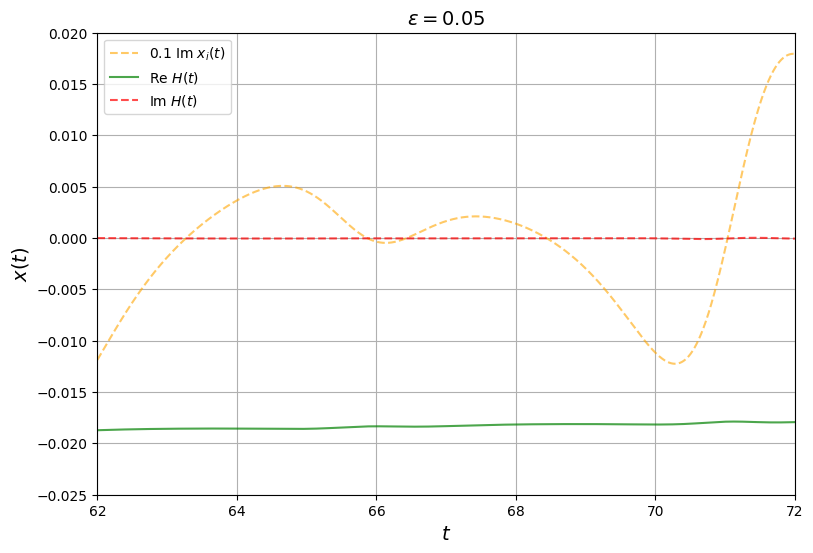

In [ ]:
# Plotting the results
plt.figure(figsize=(9, 6))
plt.plot(t, x_r, label='Re $x(t)$' )
plt.plot(t, x_r0, label='Re $x(t)$ for $\epsilon = 0$' , alpha=0.4)
plt.plot(t, 0.1*x_i, label='0.1 Im $x(t)$')
plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$x(t)$', fontsize=14)
plt.xlim(0,80)
plt.ylim(-2,2)
plt.title(f'$\epsilon = {epsilon}$', fontsize=14)
plt.grid(True)
plt.show()


# Plotting the results
plt.figure(figsize=(9, 6))
plt.plot(t, x_r, label='Re $x(t)$', alpha= 0.33)
plt.plot(t, 0.1*x_i, label='0.1 Im $x(t)$', alpha =0.33, linestyle = '--' )
plt.plot(t, re_ham, label='Re $H(t)$', alpha = 0.7)
plt.plot(t, im_ham, label='Im $H(t)$', alpha =0.7, linestyle= '--')
plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$x(t)$', fontsize=14)
plt.xlim(0,80)
plt.ylim(-2,2)
plt.title(f'$\epsilon = {epsilon}$', fontsize=14)
plt.grid(True)



plt.figure(figsize=(9, 6))
plt.plot(t,0.1*x_i , label='0.1 Im $x_i(t)$', alpha =0.6, linestyle = '--', c='orange')
plt.plot(t, re_ham, label='Re $H(t)$', alpha = 0.7, c='g')
# plt.plot(t, im_ham + epsilon *re_ham, label='Im $H(t)$', alpha =0.7, linestyle= '--')
plt.plot(t, im_ham, label='Im $H(t)$', alpha =0.7, linestyle= '--', c='red')
plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$x(t)$', fontsize=14)
plt.ylim(-0.025,0.02)
plt.xlim(62,72)
plt.title(f'$\epsilon = {epsilon}$', fontsize=14)
plt.grid(True)
plt.show()



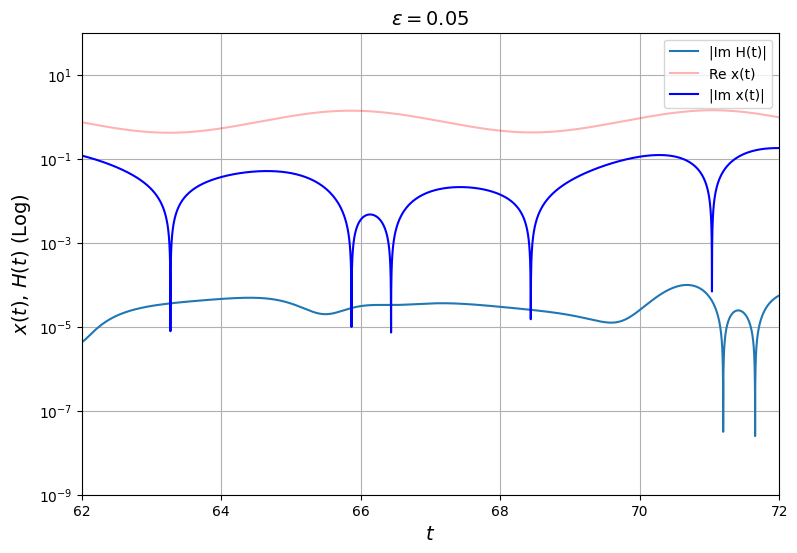

In [ ]:
plt.figure(figsize=(9, 6))

plt.plot(t,np.abs(im_ham), label= '|Im H(t)|' )
plt.plot(t, x_r, alpha = 0.3, label = 'Re x(t)', color = 'r')
plt.plot(t,np.abs(x_i), label= '|Im x(t)|', color = 'b')
plt.legend()
plt.xlim(62,72)
plt.ylim(1e-9, 1e2)
plt.yscale('log')
plt.ylabel(f'$x(t)$, $H(t)$ (Log)',fontsize=14)
plt.xlabel(f'$t$', fontsize =14)
plt.title(f'$\epsilon = {epsilon}$', fontsize=14)
plt.grid()
plt.show()

In [ ]:

# plt.figure(figsize=(10, 6))
# plt.plot(t, 0.1*x_i_wo , label='Im $x(t)$', alpha =0.6, linestyle = '--', c= 'orange')
# plt.plot(t, re_ham_wo - epsilon * im_ham_wo, label='Re $H(t)$', alpha = 0.7)
# # plt.plot(t, im_ham + epsilon *re_ham, label='Im $H(t)$', alpha =0.7, linestyle= '--')
# plt.plot(t, im_ham_wo + re_ham_wo * epsilon, label='Im $H(t)$', alpha =0.7, linestyle= '--', c='red')
# plt.legend()
# plt.xlabel('t')
# plt.ylabel('x(t)')
# plt.ylim(-0.025,0.06)
# # # plt.xlim(55,75)
# # plt.xlim(300,360)
# plt.xlim(55,75)
# plt.title(f'Solution of the ODE with $\epsilon = {epsilon}$ at large $t$')
# plt.grid(True)
# plt.show()


# plt.figure(figsize=(10, 6))
# plt.plot(t, 0.1*x_i_wo , label=r'Im $x(t)$, $t\rightarrow t(1+i\epsilon)$', alpha =0.5, c = 'b')
# plt.plot(t, im_ham_wo+ re_ham_wo*epsilon, label=r'Im $H(t)$, $t\rightarrow t(1+i\epsilon)$', alpha =0.5 , c='red')
# plt.plot(t, 0.1*x_i , label=r'Im $x(t)$', alpha =0.5, linestyle = '--', c = 'orange')
# plt.plot(t, im_ham, label=r'Im $H(t)$', alpha = 0.5, linestyle = '--', c='g')
# plt.legend()
# plt.xlabel('t')
# plt.ylabel('x(t)')
# plt.ylim(-0.025,0.06)
# plt.xlim(55,75)
# plt.title(f'Solution of the ODE with $\epsilon = {epsilon}$ at large $t$')
# plt.grid(True)
# plt.show()


In [ ]:
# # x_r and homogeneous solution

# plt.figure(figsize=(10, 6))

# plt.plot(t,x_r + x_i*epsilon,label ='x_r')
# plt.plot(t,x_r0+ x_i0*epsilon, label = 'homo')
# plt.grid()
# plt.legend()
# plt.xlim(40,80)


In [ ]:



# plt.figure(figsize=(10, 6))
# plt.plot(t, re_ham - im_ham*epsilon, label='Tunneling Re $H(t)$', alpha = 0.7, c='g')
# # plt.plot(t, im_ham + re_ham * epsilon, label='Im $H(t)$', alpha =0.7, linestyle= '--', c='orange')
# # plt.plot(t, im_ham + epsilon *re_ham, label='Im $H(t)$', alpha =0.7, linestyle= '--')
# plt.plot(t, 0.01* x_i, label = ' Im x(t) ', alpha =0.5, c='b')
# plt.plot(t, 0.0034686+ re_ham0, label='Eps=0 $ReH(t)$', alpha =0.7, linestyle= '--', c='red')
# plt.plot(t, )
# plt.legend()
# plt.xlabel('t')
# plt.ylabel('x(t)')
# plt.ylim(-0.03, 0.03)
# # plt.xlim(50,75)
# plt.xlim(0,75)
# plt.title(f'Solution of the ODE with $\epsilon = {epsilon}$ at large $t$')
# plt.grid(True)
# plt.show()


# # plt.figure(figsize=(10, 6))
# # plt.plot(t, v_r**2, label='Tunneling Re $v$', alpha = 0.7, c='g')
# # plt.plot(t, v_r0**2, label='Re $v_0$', alpha = 0.7, c='r')
# # plt.legend()
# # plt.xlabel('t')
# # plt.ylabel('x(t)')
# # plt.xlim(0,75)
# # plt.ylim(0, 1)
# # # plt.xlim(50,75)
# # plt.title(f'Solution of the ODE with $\epsilon = {epsilon}$ at large $t$')
# # plt.grid(True)
# # plt.show()


In [ ]:



# plt.figure(figsize=(10, 6))
# plt.plot(t, re_ham_wo - im_ham_wo*epsilon, label='Tunneling Re $H(t)$', alpha = 0.7, c='g')
# # plt.plot(t, im_ham + re_ham * epsilon, label='Im $H(t)$', alpha =0.7, linestyle= '--', c='orange')
# # plt.plot(t, im_ham + epsilon *re_ham, label='Im $H(t)$', alpha =0.7, linestyle= '--')
# plt.plot(t, 0.01* x_i_wo, label = ' Im x(t) ', alpha =0.5, c='b')
# plt.plot(t, re_ham_wo, label='Eps=0 $ReH(t)$', alpha =0.7, linestyle= '--', c='red')
# plt.legend()
# plt.xlabel('t')
# plt.ylabel('x(t)')
# plt.ylim(-0.03, 0.03)
# # plt.xlim(50,75)
# plt.xlim(0,75)
# plt.title(f'Solution of the ODE with $\epsilon = {epsilon}$ at large $t$')
# plt.grid(True)
# plt.show()


In [ ]:
f1 = f0 * x0**(-4)
h0 = x0**3 * f1 *  (x_r0 + x_i0 * epsilon )
h1 = x0**3 * f1 *  (x_r  + x_i * epsilon )
# h2 = x0**3 * f1 *  (x_r_wo + x_i_wo * epsilon )

In [ ]:
time_pos = np.where(t>66.15)[0][0]

dh0 = np.trapz(h0[0:time_pos],t[0:time_pos])
dh1 = np.trapz(h1[0:time_pos],t[0:time_pos])

print(r'\n $\Delta H0_ext$ =', np.round(re_ham0[0]-re_ham0[time_pos],6))
print(r'Integrate H0_ext over t = ', np.round(dh0, 6))
print(r'Differences are:',  np.round(re_ham0[0]-re_ham0[time_pos] - dh0,6))

print(r'\n $\Delta H_ext$ =', np.round(re_ham[0]-re_ham[time_pos],6))
print(r'Integrate H_ext over t = ', np.round(dh1, 6))
print(r'Differences are:',  np.round(re_ham[0]-re_ham[time_pos] - dh1,6))

# dh2 = np.trapz(h2[0:time_pos],t[0:time_pos])
# print(re_ham_wo[0]-re_ham_wo[time_pos])
# print(dh2)

\n $\Delta H0_ext$ = 0.005502
Integrate H0_ext over t =  0.005502
Differences are: 0.0
\n $\Delta H_ext$ = 0.00072
Integrate H_ext over t =  0.000682
Differences are: 3.9e-05


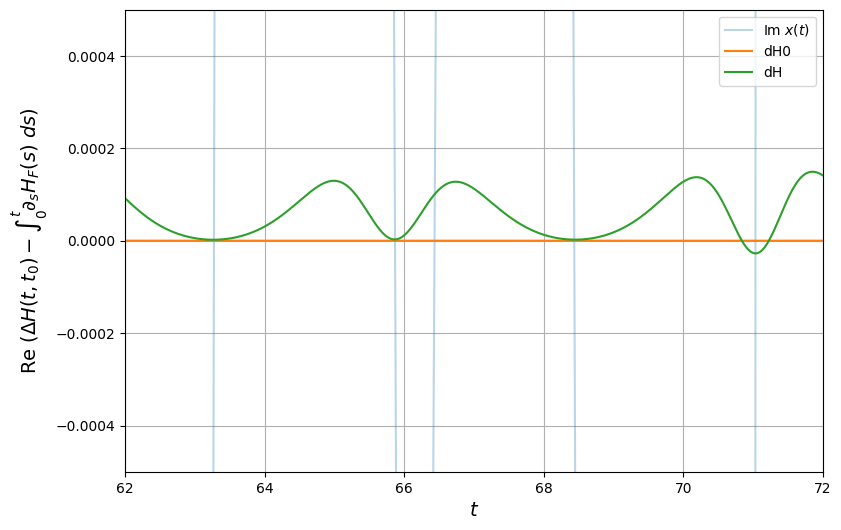

In [ ]:
int_h0_list = []
int_h1_list = []

d_h0_list = []
d_h1_list = []

xrange = range(1,len(t),10)

for idx in xrange:
    int_h0 = np.trapz(h0[0:idx],t[0:idx])
    int_h1 = np.trapz(h1[0:idx],t[0:idx])

    int_h0_list.append(int_h0)
    int_h1_list.append(int_h1)
    d_h0_list.append(re_ham0[0]-re_ham0[idx] - int_h0)
    d_h1_list.append(re_ham[0]-re_ham[idx] - int_h1)

# plt.plot(t[xrange], int_h0_list, label = 'Int H0' )
# plt.plot(t[xrange], int_h1_list, label = 'Int H1' )
plt.figure( figsize=(9,6))

plt.plot(t[xrange], x_i[xrange], label = 'Im $x(t)$', alpha = 0.3)
plt.plot(t[xrange], d_h0_list, label = 'dH0' )
plt.plot(t[xrange], d_h1_list, label = 'dH' )
plt.legend()
plt.xlim(62,72 )
plt.ylim(-5e-4, 5e-4)
plt.ylabel('Re ($\Delta H(t,t_0) - \int^t_0 \partial_s H_F(s) \  ds$)', fontsize = 14)
plt.xlabel('$t$', fontsize = 14)
plt.grid()
plt.show()

In [ ]:

yh_v = [0,0, v_r0, v_i0]
yh_x = [x_r0, x_i0,0,0]


y_v = [0,0, v_r, v_i]
y_x = [x_r, x_i, 0,0]



re_ke0, im_ke0 = forced_hamiltonian( y= yh_v, t=t, epsilon = 0, x0=x0, m= 1, lam=1, f0=f0)
re_pe0, im_pe0 = forced_hamiltonian( y= yh_x, t=t, epsilon = 0, x0=x0, m= 1, lam=1, f0=f0)

re_ke, im_ke = forced_hamiltonian( y= y_v, t=t, epsilon = epsilon, x0=x0, m= 1, lam=1, f0=f0)
re_pe, im_pe = forced_hamiltonian( y= y_x, t=t, epsilon = epsilon, x0=x0, m= 1, lam=1, f0=f0)
re_pe_nf, im_pe_nf = forced_hamiltonian( y= y_x, t=t, epsilon = epsilon, x0=x0, m= 1, lam=1, f0=0)
re_ke_nf, im_ke_nf = forced_hamiltonian( y= y_v, t=t, epsilon = epsilon, x0=x0, m= 1, lam=1, f0=0)



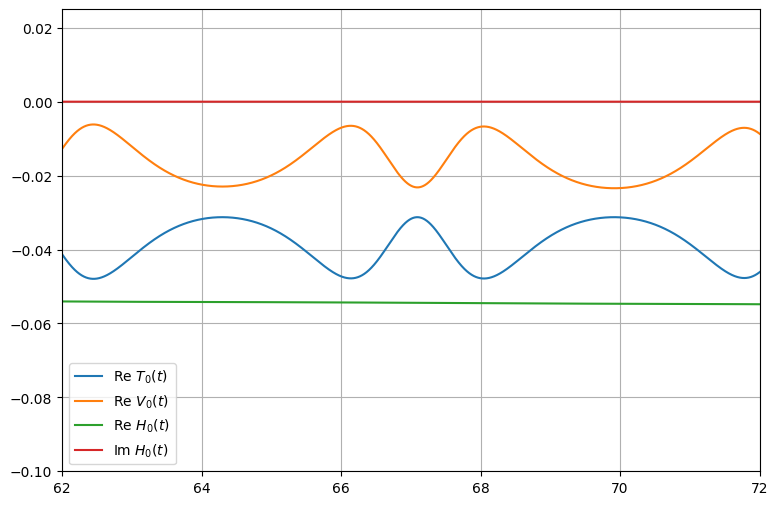

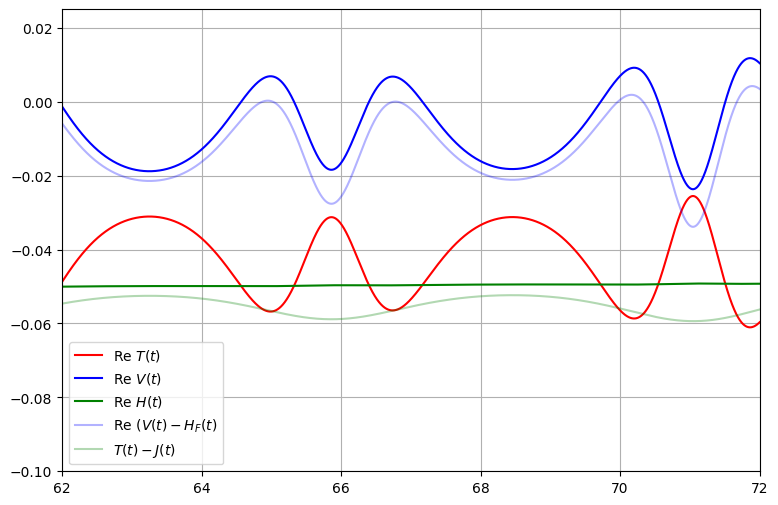

In [ ]:

plt.figure( figsize = (9,6) )

plt.plot(t, re_ke0, label=f'Re $T_0(t)$')
plt.plot(t, re_pe0, label=f'Re $V_0(t)$')
plt.plot(t, re_ke0 + re_pe0, label=f'Re $H_0(t)$')
plt.plot(t, im_ke0 + im_pe0, label=f'Im $H_0(t)$')
plt.xlim(62,72)
plt.ylim(-0.1,0.025)
plt.grid()
plt.legend()
plt.show()


plt.figure( figsize = (9,6) )
plt.plot(t, re_ke, label=f'Re $T(t)$',color='r')
plt.plot(t, re_pe, label=f'Re $V(t)$',color='b')
plt.plot(t, re_ke + re_pe, label=f'Re $H(t)$', color='g')
plt.plot(t, re_pe_nf, label=f'Re $(V(t) - H_F(t)$', alpha=0.3, color='b')
plt.plot(t, re_ke_nf + re_pe_nf, label=f'$T(t) - J(t)$', alpha=0.3, color='g')
plt.legend()
plt.xlim(62,72)
plt.ylim(-0.1,0.025)
plt.grid()
plt.show()

In [ ]:
from scipy import integrate
import numpy as np

# Define the oscillating function
def f(x):
    return np.sin(10 * x)

# Perform the integration with tight tolerances
integral, error = integrate.quad(f, 0,  10, epsabs=1e-12, epsrel=1e-12)

print(f"Integral with higher precision: {integral}")
print(f"Estimated error: {error}")


Integral with higher precision: 0.013768112771227655
Estimated error: 7.018945494434025e-14


In [ ]:
range(1,len(t),10)[:3]

range(1, 31, 10)

In [ ]:
print(range(len(t),10))

IndexError: range object index out of range

In [ ]:
pot = potential_profile(xr = x_r[time_pos], xi = x_i[time_pos], t=t[time_pos], epsilon= epsilon , x0=x0, m=1, lam=1, f0=f0 )
pot_t0 = potential_profile(xr = x_r[0], xi = x_i[0], t=t[0], epsilon= epsilon , x0=x0, m=1, lam=1, f0=f0 )

pot0 = potential_profile(xr = x_r0[0], xi = x_i0[0], t=t[0], epsilon= epsilon , x0=x0, m=1, lam=1, f0=f0 )
pot0_t0 = potential_profile(xr = x_r0[0], xi = x_i0[0], t=t[0], epsilon= epsilon , x0=x0, m=1, lam=1, f0=f0 )

In [ ]:
print(pot0_t0)
print(re_ham0[0], re_ham[0])

(-0.0176220703125, 0.0)
-0.017578125 -0.0176220703125


In [ ]:
# H0 + Delta V(x) = H(t)

# dH = re_ham[0]-re_ham[time_pos]
# dH0 = re_ham0[0]-re_ham0[time_pos]


re_pot_t, im_pot_t = potential_profile(xr = x_r, xi = x_i, t=t, epsilon= epsilon , x0=x0, m=1, lam=1, f0=f0 )
re_pot_t0, im_pot_t0 = potential_profile(xr = x_r[0], xi = x_i[0], t=t[0], epsilon= epsilon , x0=x0, m=1, lam=1, f0=f0 )

re_pot0_t, im_pot0_t = potential_profile(xr = x_r0, xi = x_i0, t=t, epsilon= epsilon , x0=x0, m=1, lam=1, f0=f0 )

In [ ]:
# re_dp = re_pot_t - re_pot_t0
# im_dp = im_pot_t - im_pot_t0

re_dp = re_pot_t - re_pot0_t

In [ ]:
re_ham[time_pos] - re_ham0[time_pos] + re_dp[time_pos]

0.02152136756636889

In [ ]:
re_dp[time_pos]

0.017720721144732925

In [ ]:
print(re_ham0[time_pos], pot0[0] )

-0.022023028923230437 -0.0176220703125


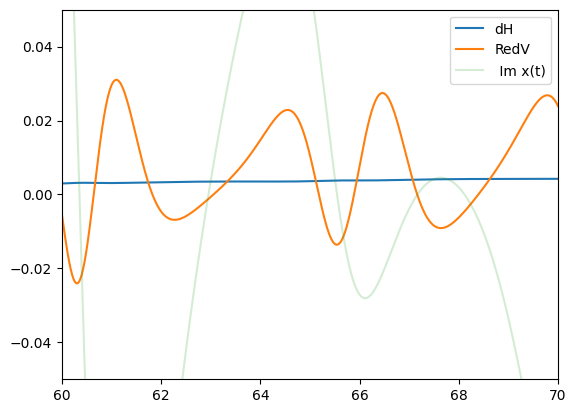

In [ ]:
plt.plot( t, re_ham -re_ham0, label = 'dH')
plt.plot( t, re_dp, label='RedV' )
plt.plot( t, x_i, label=' Im x(t)' ,alpha =0.2)

plt.ylim(-0.05,0.05)
plt.xlim(60,70)
plt.legend()

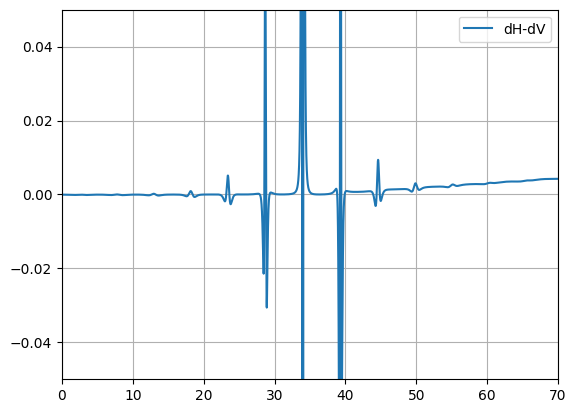

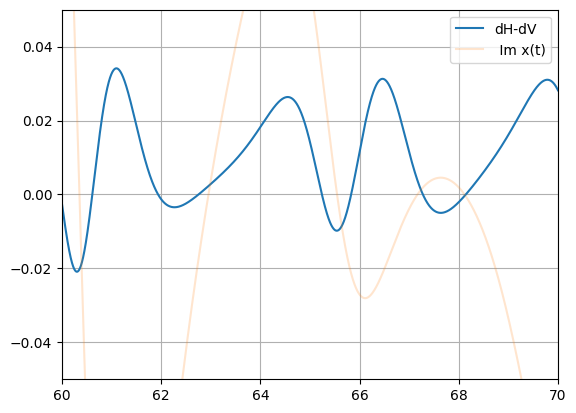

In [ ]:
plt.plot( t, re_ham - re_ham0, label='dH-dV')
plt.legend()
plt.xlim(0,70)
plt.ylim(-0.05,0.05)
plt.grid()
plt.show()


plt.plot( t, re_ham - re_ham0 + re_dp, label='dH-dV')
plt.plot( t, x_i, label=' Im x(t)' ,alpha =0.2)
plt.legend()
plt.xlim(60,70)
plt.ylim(-0.05,0.05)
plt.grid()
plt.show()

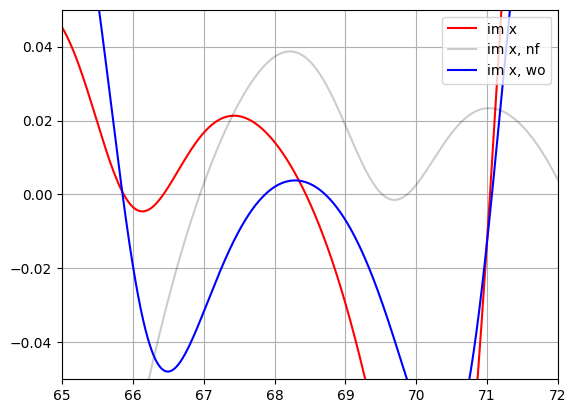

In [ ]:
plt.plot(t, x_i, label='im x', color = 'r')
plt.plot(t, x_inf, label='im x, nf', alpha=0.2, color = 'k')
plt.plot(t, x_i_wo, label='im x, wo', color= 'b' )
plt.legend()
plt.grid()
plt.ylim(-0.05,0.05)
plt.xlim(65,72)
plt.show()

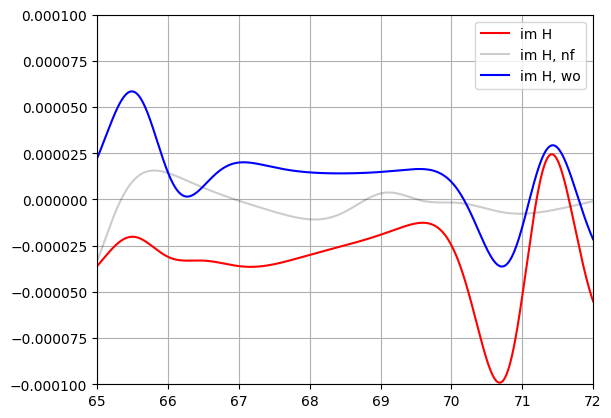

In [ ]:
plt.plot(t, im_ham, label='im H', color = 'r')
plt.plot(t, im_hamnf, label='im H, nf', alpha=0.2, color='k')
plt.plot(t, im_ham_wo, label='im H, wo', color ='b')
plt.legend()
plt.grid()
plt.ylim(-0.0001,0.0001)
plt.xlim(65,72)
plt.show()



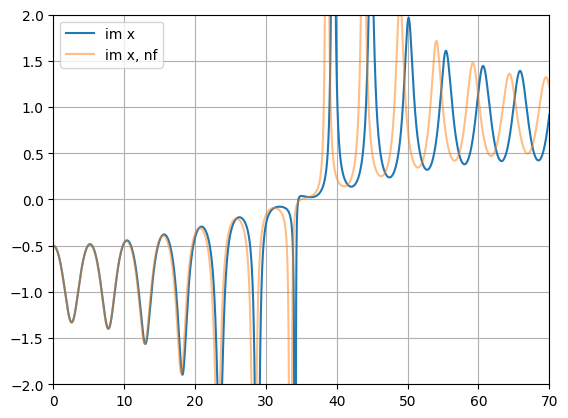

In [ ]:
plt.plot(t, x_r, label='im x')
plt.plot(t, x_rnf, label='im x, nf', alpha=0.5)
plt.legend()
plt.grid()
plt.ylim(-2,2)
plt.xlim(0,70)
plt.show()